<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h2 style="text-align: center;"><b>Анализ данных по методологии CrispDM</b></h2>

# 1. Анализ данных
## 1.1 Импорт библиотек

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [21]:
# # Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [22]:
import os
import sys

sys.path.insert(0, '..')

In [23]:
from scripts.data.util import load_dataset

## 1.2 Загрузка данных

In [24]:
wine = load_dataset()
wine.shape

(6497, 13)

## 1.3 Статистика и визуализации

In [25]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Описание переменных: Входные переменные (на основе физико-химических тестов):

* fixed acidity - фиксированная кислотность
* volatile acidity - летучая кислотность
* citric acid - лимонная кислота
* residual sugar - остаточный сахар
* chlorides - хлориды
* free sulfur dioxide - свободный диоксид серы
* total sulfur dioxide - общий диоксид серы
* density - плотность
* pH - pH
* sulphates - сульфаты
* alcohol - спирт 

Выходная переменная (на основе сенсорных данных):
* quality- качество (оценка от 0 до 10)


type(тип вина) - категориальныя переменная: white и red

quality (качество вина) - целевая переменная, представлена целыми числами от 0 до 10

### 1.3.1 Информация о переменных

In [26]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


 Проверим данные на пропуски.

In [27]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [28]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 1.3.2 Тепловая карта корреляции

<AxesSubplot:>

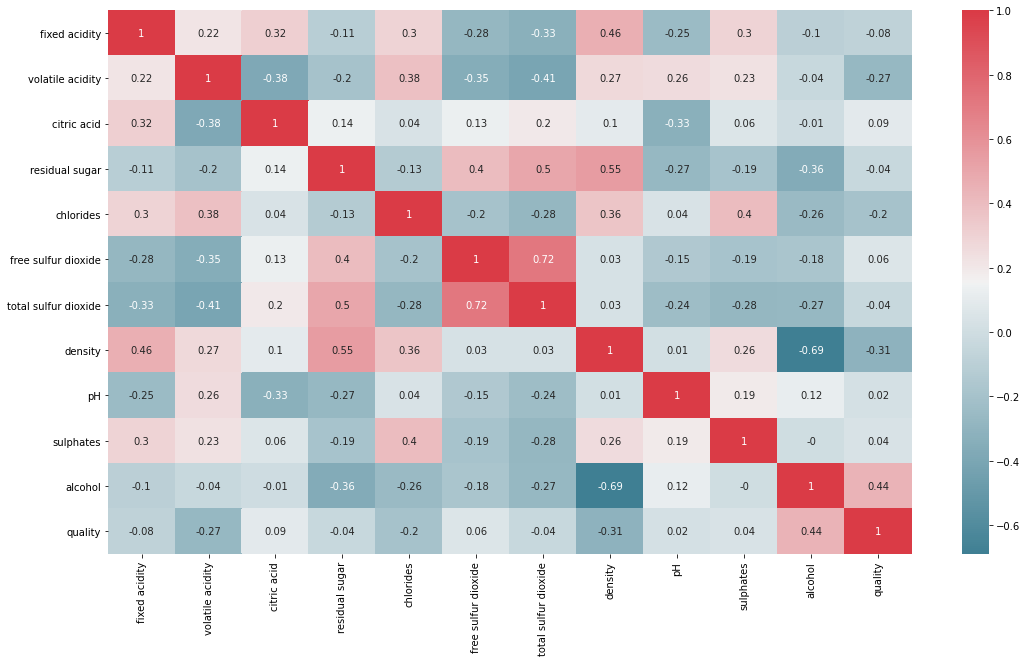

In [29]:
rcParams['figure.figsize'] = 18,10

cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
sns.heatmap(wine.corr().round(2), annot=True, cmap = cmap)

По тепловой карте видно, что переменные, которые больше всего коррелируют с качеством вина - это летучая кислотность, плотность и спирт. Так же есть сильные зависимости с некоторыми другими переменными (плотность, остаточный сахар, фиксированная кислотность). 

### 1.3.3 Взаимосвязь между типом и качеством вина

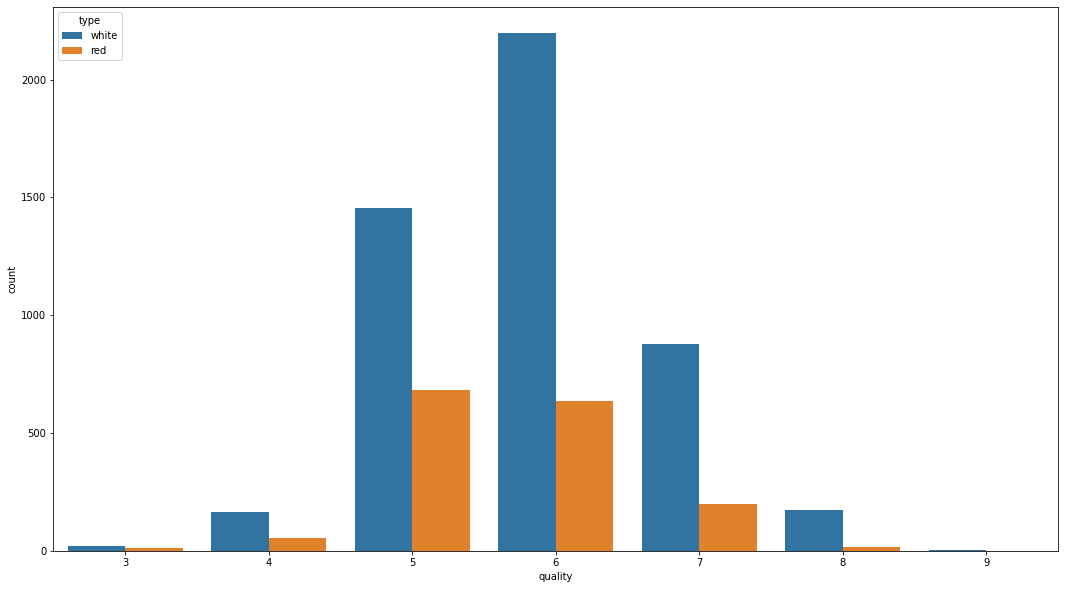

In [30]:
#sns.set(style="darkgrid")
sns.countplot(wine["quality"],hue="type",data=wine)
plt.show()

### 1.3.4 Взаимосвязь между качеством вина и содержанием спирта

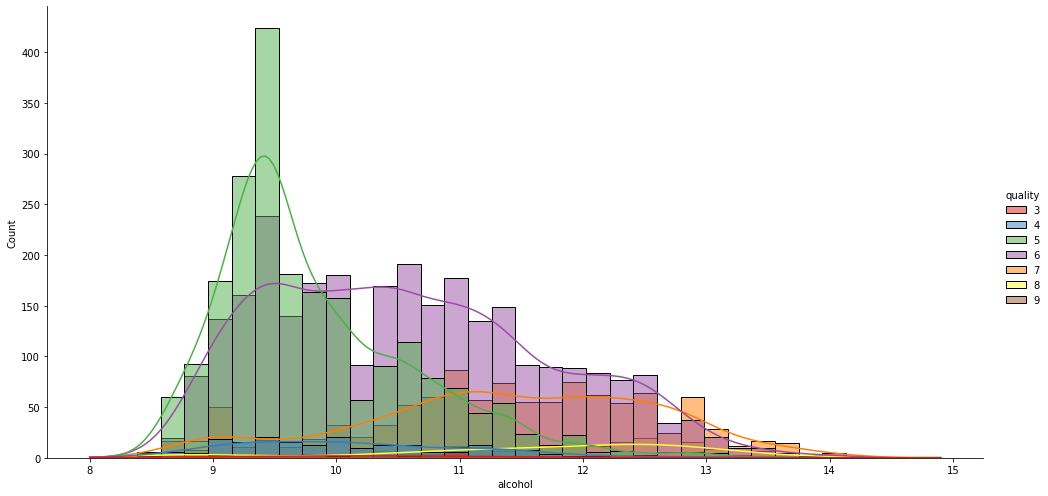

In [15]:
sns.displot(x=wine['alcohol'], hue=wine['quality'], palette='Set1', height=7, aspect=2, kde=True)

### 1.3.5 Визуализация зависимостей качества вина от важных признаков

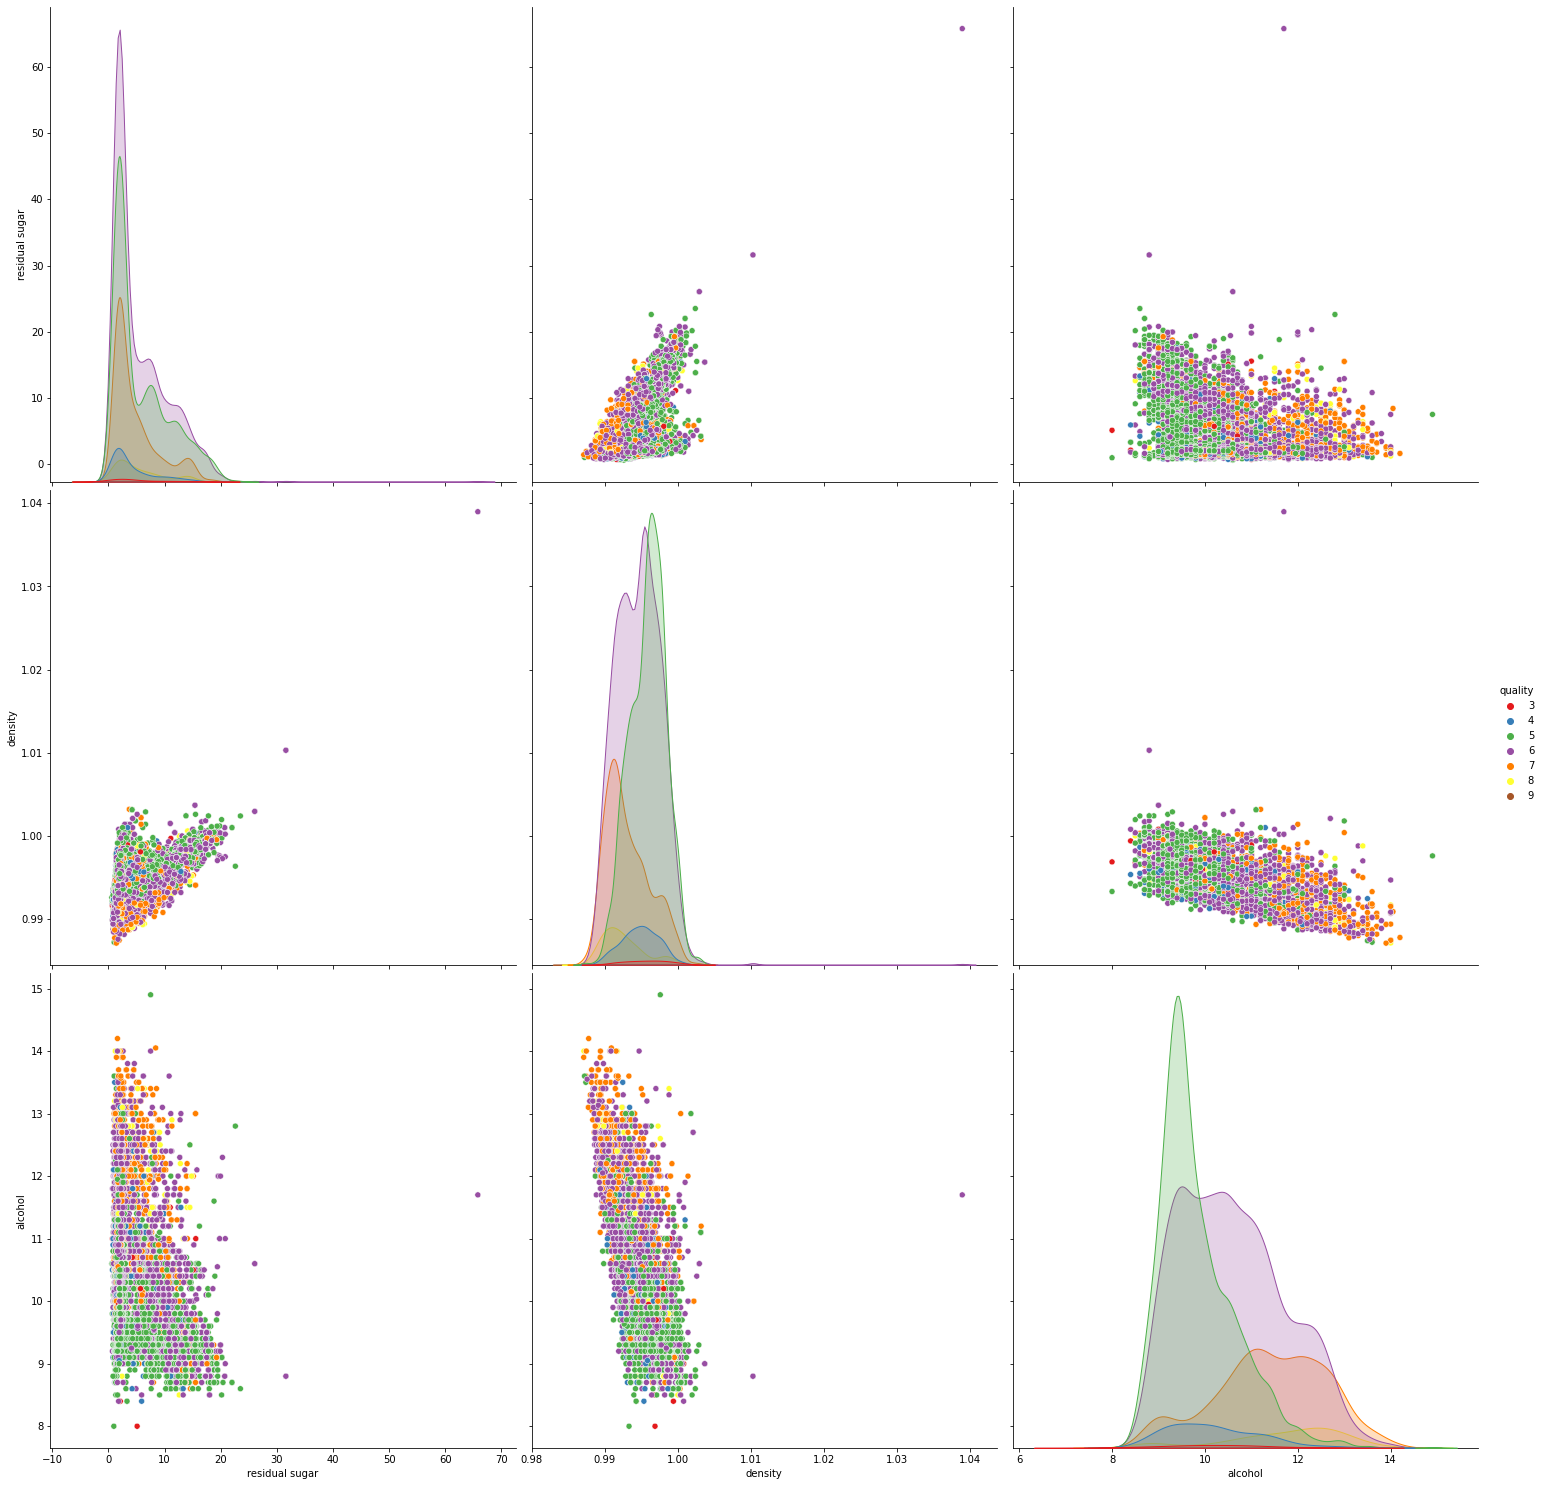

In [31]:
sns.pairplot(wine[['quality', 'residual sugar', 'density', 'alcohol']], hue='quality', palette='Set1',  height=7)

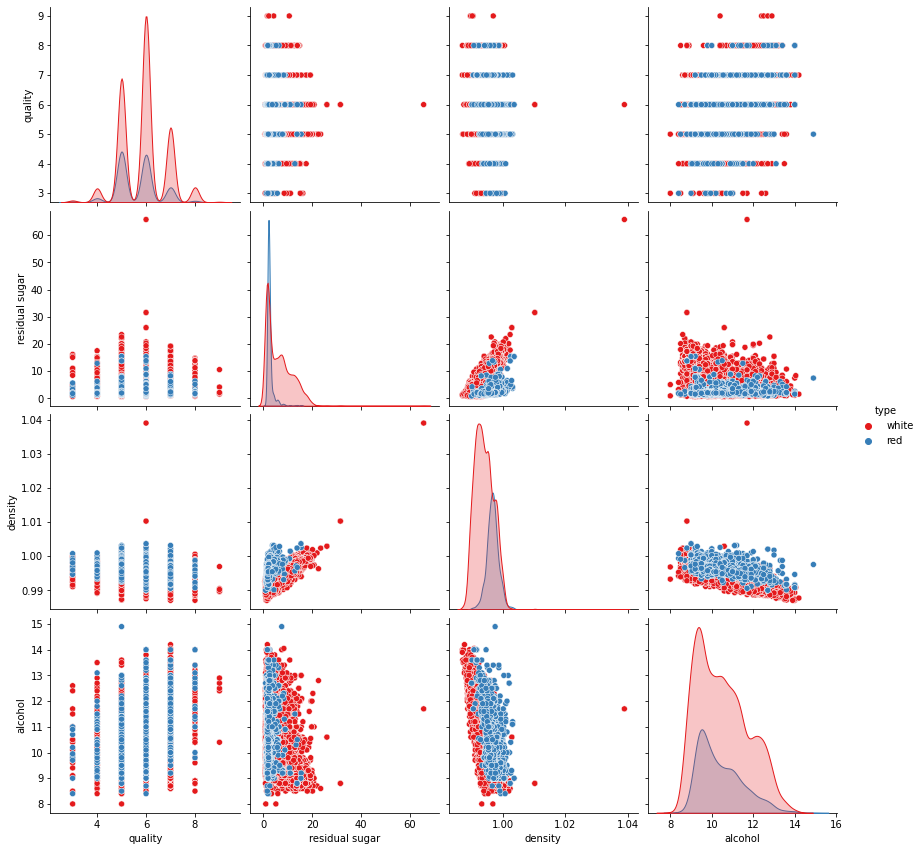

In [32]:
sns_plot = sns.pairplot(wine, 
                        x_vars=['quality', 'residual sugar', 'density', 'alcohol'], 
                        y_vars=['quality', 'residual sugar', 'density', 'alcohol'], 
                        hue='type', 
                        height=3, 
                        palette='Set1')
plt.show()

Можно довольно легко увидеть, что почти у всех признаков есть один или несколько выбросов.